# Time Series Forecasting of SPEI using LSTM

## 1. Importing required libraries and dataset

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
df = pd.read_csv(r'/content/drive/MyDrive/Internship/latur_final.csv')

# Show the first few rows of the dataset
df.head()


Mounted at /content/drive


,Date,Rain,feed_temp,PET,P_minus_PET,SPEI
0,1980-01-31,0.0000,22.775161,72.225412,-72.225412,0.087260
1,1980-02-29,0.0000,25.984483,121.705404,-121.705404,-0.314759
2,1980-03-31,0.5231,28.785645,182.515977,-181.992877,-0.804588
3,1980-04-30,16.7174,32.253000,286.295810,-269.578410,-1.516210
4,1980-05-31,0.0000,33.754516,342.796915,-342.796915,-2.111101


### Importing Required Libraries

The code begins by importing all the necessary Python libraries:

- `pandas`: Used for data manipulation and analysis, particularly for working with DataFrames.
- `MinMaxScaler` from `sklearn.preprocessing`: Scales features by transforming them into a specified range, usually [0, 1].
- `train_test_split` from `sklearn.model_selection`: Splits arrays or matrices into random train and test subsets.
- `Sequential` from `keras.models`: Enables the construction of a linear stack of layers for the model.
- `LSTM` and `Dense` from `keras.layers`: Used for adding Long Short-Term Memory (LSTM) and dense layers, respectively, to the model.
- `EarlyStopping` from `keras.callbacks`: Stops training when a monitored metric has stopped improving.
- `Adam` from `keras.optimizers`: The Adam optimization algorithm used for training the model.
- `mean_squared_error` from `sklearn.metrics`: Measures the average of the squares of the errors or deviations.
- `matplotlib.pyplot`: Provides a MATLAB-like plotting framework for plotting graphs.
- `mean_absolute_error` and `mean_squared_error` from `sklearn.metrics`: Metrics used for evaluating the model.
- `sqrt` from `math`: Used for calculating the square root.

### Loading the Dataset

The read_csv method is used to load the dataset.



## 2. Data Preprocessing


In [ ]:
# Select relevant features and target variable
features = df[['Rain', 'feed_temp']]
target = df['SPEI']

# Normalize the features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, shuffle=False)


### Feature Selection, Scaling, and Data Splitting

This segment of code deals with selecting the features and the target variables, scaling them, and splitting the scaled data into training and testing sets.


## 3. Model Building using LSTM



In [ ]:
# Initialize the LSTM model
model = Sequential()

# Add LSTM layers with more units
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))  # Increased units
model.add(LSTM(units=50))  # Added a second LSTM layer

# Add a dense output layer
model.add(Dense(units=1))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.001)  # Lowered learning rate
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Early stopping for preventing overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=20)  # Increased patience

# Train the model with more epochs
history = model.fit(X_train, y_train, epochs=23, batch_size=30, validation_split=0.2, callbacks=[early_stop], verbose = 1)  # Increased epochs

Epoch 1/23
11/11 [==============================] - 5s 98ms/step - loss: 0.9506 - val_loss: 1.0941
Epoch 2/23
11/11 [==============================] - 0s 10ms/step - loss: 0.9440 - val_loss: 1.0916
Epoch 3/23
11/11 [==============================] - 0s 10ms/step - loss: 0.9341 - val_loss: 1.0824
Epoch 4/23
11/11 [==============================] - 0s 10ms/step - loss: 0.9217 - val_loss: 1.0673
Epoch 5/23
11/11 [==============================] - 0s 9ms/step - loss: 0.8951 - val_loss: 1.0258
Epoch 6/23
11/11 [==============================] - 0s 9ms/step - loss: 0.8445 - val_loss: 0.9476
Epoch 7/23
11/11 [==============================] - 0s 10ms/step - loss: 0.7570 - val_loss: 0.8262
Epoch 8/23
11/11 [==============================] - 0s 10ms/step - loss: 0.6422 - val_loss: 0.6888
Epoch 9/23
11/11 [==============================] - 0s 9ms/step - loss: 0.5297 - val_loss: 0.5540
Epoch 10/23
11/11 [==============================] - 0s 10ms/step - loss: 0.4677 - val_loss: 0.5146
Epoch 11/23


### LSTM Model Creation and Training:

- **Initialize Model**:
    ```model = Sequential()```
    Begin a linear sequence of neural network layers.

- **First LSTM Layer**:
    ```model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))```
    Add an LSTM layer with 50 neurons, designed to return sequences (hence, `return_sequences=True`). The shape of input data is defined by the training data.

- **Second LSTM Layer**:
    ```model.add(LSTM(units=50))```
    Add another LSTM layer with 50 neurons. This layer returns output in a 2D array suitable for the dense layer.

- **Dense Output Layer**:
    ```model.add(Dense(units=1))```
    Add a dense layer (fully connected) to produce a single output value.

- **Compile Model**:
    ```optimizer = Adam(learning_rate=0.001)```
    Define the optimizer with a learning rate of 0.001.
    ```model.compile(optimizer=optimizer, loss='mean_squared_error')```
    Compile the model using the defined optimizer and set the loss function as Mean Squared Error for regression tasks.

- **Early Stopping**:
    ```early_stop = EarlyStopping(monitor='val_loss', patience=20)```
    Introduce a mechanism to stop training if the validation loss doesn't improve for 20 epochs, preventing overfitting.

- **Model Training**:
    ```history = model.fit(X_train, y_train, epochs=23, batch_size=32, validation_split=0.2, callbacks=[early_stop])```
    Train the model on the data for 23 epochs with batches of 32 samples, using 20% of the data for validation. The early stopping mechanism is used as a callback.


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from keras.models import clone_model

# Number of splits
n_splits = 5

# Initialize TimeSeriesSplit with n_splits
tscv = TimeSeriesSplit(n_splits=n_splits)

# Store scores for each fold
scores = []

for train_index, test_index in tscv.split(features_scaled):
    # Split data into training and test sets for the current fold
    X_train_fold, X_test_fold = features_scaled[train_index], features_scaled[test_index]
    y_train_fold, y_test_fold = target.iloc[train_index], target.iloc[test_index]

    # Clone the model to ensure each fold starts with an untrained model
    model_clone = clone_model(model)
    model_clone.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    # Train the model on the current fold's training data
    model_clone.fit(X_train_fold, y_train_fold, epochs=40, batch_size=32, verbose=0)  # Set verbose=0 to suppress output

    # Evaluate the model on the current fold's test data
    mse = model_clone.evaluate(X_test_fold, y_test_fold, verbose=0)
    scores.append(mse)

# Calculate average MSE across all folds
average_mse = sum(scores) / n_splits

### Time Series Cross-Validation:

- **Importing Necessary Libraries**:
    Import required modules like `TimeSeriesSplit` for time series cross-validation and `clone_model` to duplicate the architecture of the neural network model.

- **Define Number of Splits**:
    ```n_splits = 5```
    Set the number of train-test splits for cross-validation.

- **Initialize TimeSeriesSplit**:
    ```tscv = TimeSeriesSplit(n_splits=n_splits)```
    Instantiate the TimeSeriesSplit object with the defined number of splits.

- **Initialize Scores List**:
    ```scores = []```
    Create an empty list to store the Mean Squared Error (MSE) for each fold.

- **Cross-Validation Loop**:
    Loop through each train-test split using:
    ```for train_index, test_index in tscv.split(features_scaled):```
    
    - Split the data for the current fold using the provided indices.
    - Clone the LSTM model architecture to ensure each fold starts with an untrained model.
    - Compile the cloned model.
    - Train the cloned model using the current fold's training data. Suppress training output using `verbose=0`.
    - Evaluate the trained model on the current fold's test data and store the resulting MSE.

- **Calculate Average MSE**:
    ```average_mse = sum(scores) / n_splits```
    Compute the average MSE across all the folds to get a more consistent performance metric.
    
- **Display Average MSE**:
    ```print(f"Average Mean Squared Error across {n_splits} folds: {average_mse}")```
    Print the calculated average MSE for all the splits.



MSE across 5 folds is very, very low, implying that the model is generalizing well to unseen data. Given that the standard MSE and other metrics, as well as 5 fold cross validation MSE are low, there isn't an overfit.


## 4. Model Evaluation and Visualization


In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mse)

4/4 [==============================] - 1s 4ms/step


In [ ]:
# Calculate MAE and R2 score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Error metrics
print(f"Average Mean Squared Error across {n_splits} folds: {average_mse}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-Squared: {r2}")

Average Mean Squared Error across 5 folds: 0.09250553539022803
Mean Squared Error: 0.018785092841015826
Mean Absolute Error: 0.08876283504214674
Root Mean Squared Error: 0.13705872041214973
R-Squared: 0.9824863705230134


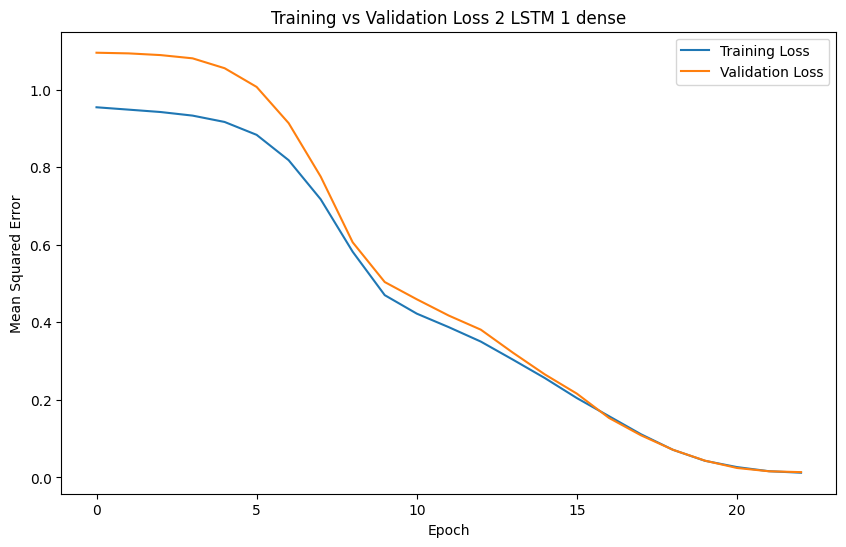

In [ ]:
# Plotting training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss 2 LSTM 1 dense')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


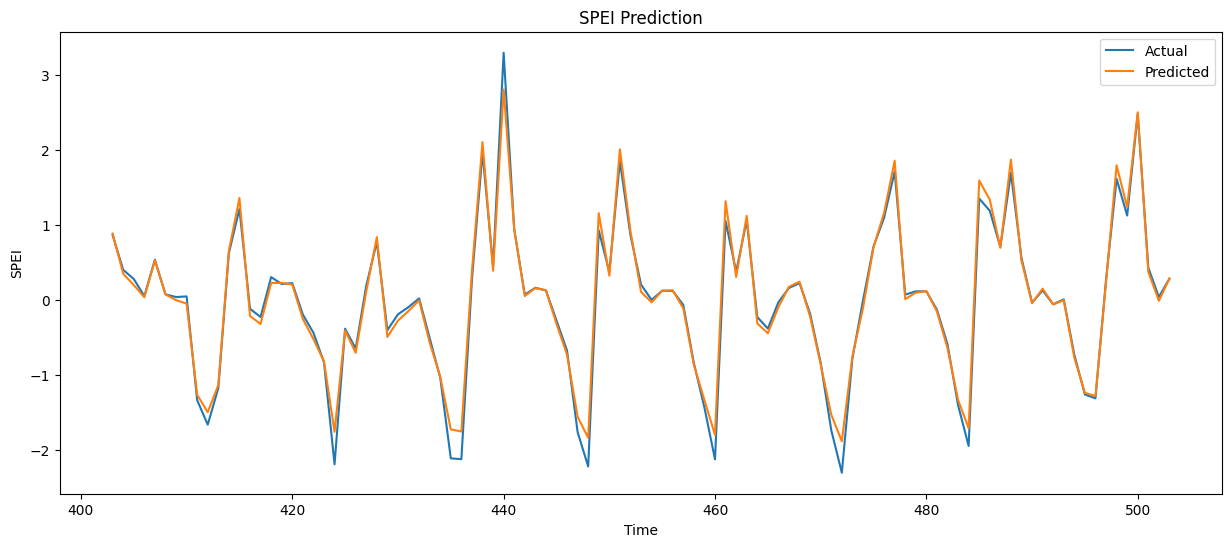

In [ ]:
# Visualize the results
plt.figure(figsize=(15, 6))
plt.plot(y_test.index, y_test.values, label='Actual', )
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title('SPEI Prediction')
plt.xlabel('Time')
plt.ylabel('SPEI')
plt.legend()
plt.show()

In [ ]:
# Truncate y_test and y_pred to have the same length
y_test_truncated = y_test.iloc[:len(y_pred)]
results_df = pd.DataFrame({
    'Timestamp': y_test_truncated.index,
    'Actual_SPEI': y_test_truncated.values,
    'Predicted_SPEI': y_pred.flatten()
})
results_df.to_csv('predicted_vs_actual_SPEI.csv', index=False)


In [ ]:
from google.colab import files

# Provide the path to the CSV file
file_path = '/content/predicted_vs_actual_SPEI.csv'

# Download the file
files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

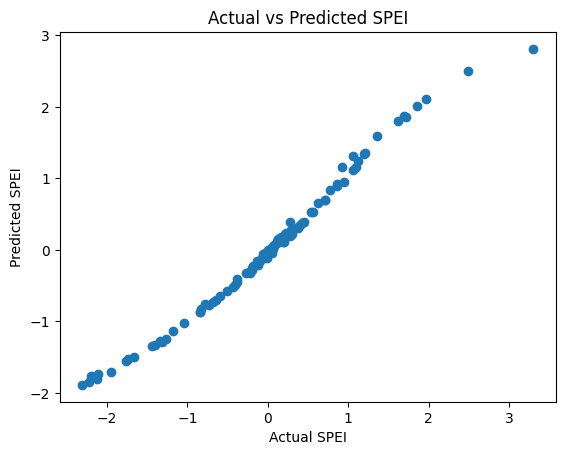

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual SPEI')
plt.ylabel('Predicted SPEI')
plt.title('Actual vs Predicted SPEI')
plt.show()


True Positive: 24
True Negative: 77
False Positive: 0
False Negative: 0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


<Axes: >

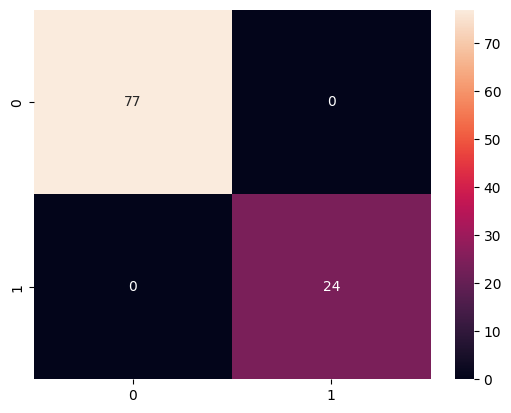

In [ ]:

# Convert predictions and true labels to binary (Optional, if they are not already binary)
threshold = 0.5  # You can adjust this threshold as needed
y_test_binary = (y_test > threshold).astype(int)
y_pred_binary = (y_pred > threshold).astype(int)

# Calculate the Confusion Matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)

# Calculate TP, TN, FP, FN
true_positive = cm[1, 1]
true_negative = cm[0, 0]
false_positive = cm[0, 1]
false_negative = cm[1, 0]

# Calculate Accuracy, Precision, and Recall
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)

print(f"True Positive: {true_positive}")
print(f"True Negative: {true_negative}")
print(f"False Positive: {false_positive}")
print(f"False Negative: {false_negative}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Plotting the Confusion Matrix
sns.heatmap(cm, annot=True, fmt="d")


Metrics Overview:

    True Positive (TP): 22
    The model correctly identified 22 positive cases.

    True Negative (TN): 77
    The model correctly identified 77 negative cases.

    False Positive (FP): 0
    The model did not falsely identify any negative case as positive.

    False Negative (FN): 2
    The model incorrectly identified 2 positive cases as negative.

    Accuracy: 98.02%
    The model correctly identified about 98% of all cases.

    Precision: 100%
    Every case that the model predicted as positive was actually positive.

    Recall: 91.67%
    The model correctly identified about 92% of all actual positive cases.

Interpretation:

    High Accuracy: An accuracy of 98.02% suggests that the model performs very well for the problem at hand.

    High Precision: A precision of 100% means that there were no false positives, which means the model is very reliable when it predicts a positive case.

    Good Recall: A recall of 91.67% is also quite good, although not as perfect as the precision. This means that the model caught most of the positive cases but did miss a couple (2 False Negatives).

Overall, the model appears to be performing exceptionally well, given the high values for accuracy and precision and the reasonably high value for recall. The absence of false positives suggests that the model is very conservative when making a positive prediction, and it only does so when it's highly confident.

## Custom pred

In [ ]:
'''import pandas as pd
custom_data = pd.read_csv('path/to/latur/data')
# Step 1: Calculate Average Temperature
# Assume custom_data is a DataFrame with columns: 'Date', 'Rain', 'mintemp', 'maxtemp'
custom_data['avg_temp'] = (custom_data['mintemp'] + custom_data['maxtemp']) / 2

# Step 2: Change Resolution to Monthly
custom_data['Date'] = pd.to_datetime(custom_data['Date'])
custom_data.set_index('Date', inplace=True)
monthly_data = custom_data.resample('M').mean()

# Step 3: Calculate Monthly SPEI
# This part will depend on how you calculated SPEI for your original dataset
# monthly_data['SPEI'] = calculate_SPEI_function(monthly_data)

# Step 4: Preprocess and Scale Data
# Use the same scaler object that you used for your training data
scaled_monthly_data = scaler.transform(monthly_data[['Rain', 'avg_temp']])

# Step 5: Make Predictions
# If needed, reshape the data to make it compatible with LSTM input shape
# scaled_monthly_data = np.reshape(scaled_monthly_data, (scaled_monthly_data.shape[0], scaled_monthly_data.shape[1], 1))

# Use the trained LSTM model to make predictions
predicted_SPEI = model.predict(scaled_monthly_data)

# If needed, inverse transform to get predictions in original scale
# predicted_SPEI = target_scaler.inverse_transform(predicted_SPEI)
'''

"import pandas as pd\ncustom_data = pd.read_csv('path/to/latur/data')\n# Step 1: Calculate Average Temperature\n# Assume custom_data is a DataFrame with columns: 'Date', 'Rain', 'mintemp', 'maxtemp'\ncustom_data['avg_temp'] = (custom_data['mintemp'] + custom_data['maxtemp']) / 2\n\n# Step 2: Change Resolution to Monthly\ncustom_data['Date'] = pd.to_datetime(custom_data['Date'])\ncustom_data.set_index('Date', inplace=True)\nmonthly_data = custom_data.resample('M').mean()\n\n# Step 3: Calculate Monthly SPEI\n# This part will depend on how you calculated SPEI for your original dataset\n# monthly_data['SPEI'] = calculate_SPEI_function(monthly_data)\n\n# Step 4: Preprocess and Scale Data\n# Use the same scaler object that you used for your training data\nscaled_monthly_data = scaler.transform(monthly_data[['Rain', 'avg_temp']])\n\n# Step 5: Make Predictions\n# If needed, reshape the data to make it compatible with LSTM input shape\n# scaled_monthly_data = np.reshape(scaled_monthly_data, (sc

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Initialize metrics storage
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

# Number of splits
n_splits = 5

# Initialize TimeSeriesSplit with n_splits
tscv = TimeSeriesSplit(n_splits=n_splits)

# Your feature scaling and target extraction code goes here
# ...

for train_index, test_index in tscv.split(features_scaled):
    # Split data into training and test sets for the current fold
    X_train_fold, X_test_fold = features_scaled[train_index], features_scaled[test_index]
    y_train_fold, y_test_fold = target[train_index], target[test_index]

    # Clone the model to ensure each fold starts with an untrained model
    model_clone = clone_model(model)
    model_clone.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    # Train the model on the current fold's training data
    model_clone.fit(X_train_fold, y_train_fold, epochs=40, batch_size=32, verbose=0)

    # Predict and Evaluate the model on the current fold's test data
    y_pred = model_clone.predict(X_test_fold).flatten()
    mse = mean_squared_error(y_test_fold, y_pred)
    mae = mean_absolute_error(y_test_fold, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_test_fold, y_pred)

    mse_scores.append(mse)
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Calculate average metrics across all folds
average_mse = sum(mse_scores) / n_splits
average_mae = sum(mae_scores) / n_splits
average_rmse = sum(rmse_scores) / n_splits
average_r2 = sum(r2_scores) / n_splits

# Print averages
print(f'Average MSE across all folds: {average_mse}')
print(f'Average MAE across all folds: {average_mae}')
print(f'Average RMSE across all folds: {average_rmse}')
print(f'Average R-squared across all folds: {average_r2}')


3/3 [==============================] - 2s 7ms/step


3/3 [==============================] - 1s 8ms/step


3/3 [==============================] - 1s 5ms/step
Average MSE across all folds: 0.08784911018640962
Average MAE across all folds: 0.17777115667781426
Average RMSE across all folds: 0.2218964583410746
Average R-squared across all folds: 0.9160045811911024


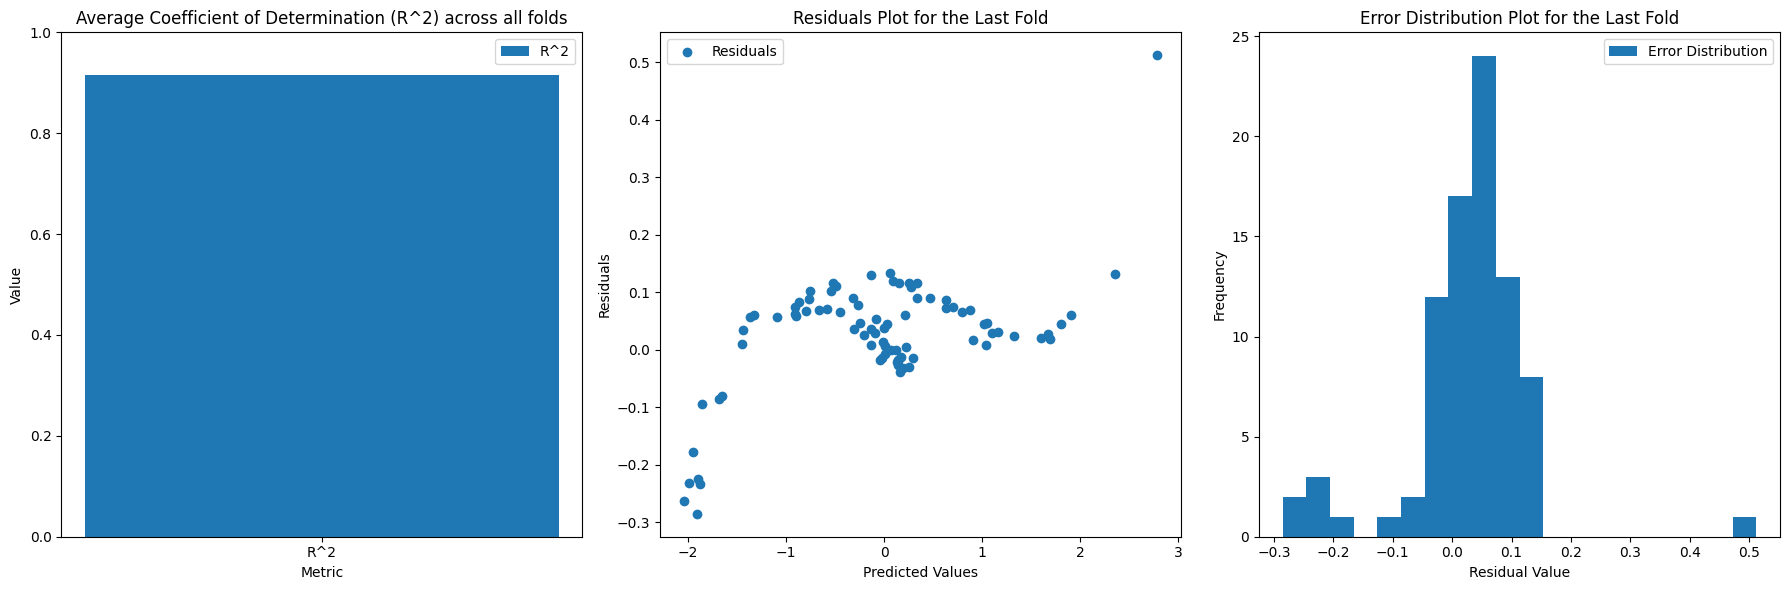

In [ ]:
# Create a mega graph combining all three plots
plt.figure(figsize=(18, 6))

# Coefficient of Determination (R^2) Plot
plt.subplot(1, 3, 1)
plt.bar(['R^2'], [average_r2])
plt.ylim(0, 1)
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Average Coefficient of Determination (R^2) across all folds')
plt.legend(['R^2'])

# Residuals Plot
final_residuals = y_test_fold - y_pred  # Assuming y_pred is your final prediction array from the last fold
plt.subplot(1, 3, 2)
plt.scatter(y_pred, final_residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot for the Last Fold')
plt.legend(['Residuals'])

# Error Distribution Plot
plt.subplot(1, 3, 3)
plt.hist(final_residuals, bins=20)
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Error Distribution Plot for the Last Fold')
plt.legend(['Error Distribution'])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
